## Laboratorio 3
Stefano Aragoni, Carol Arevalo


-------
### Análisis Exploratorio:
- Describir las series de tiempo y visualizarlas

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from IPython.display import display

Como primer paso, se importaron los diferentes datasets y se les asignó un nombre para poder trabajar con ellos. Se utilizó la función `read_csv` de la librería `pandas` para leer los archivos csv y convertirlos en dataframes.

In [85]:
# Cargar los datos
births = pd.read_csv("data/daily-total-female-births.csv", delimiter=",")
car = pd.read_csv("data/monthly-car-sales.csv", delimiter=",")
temperature = pd.read_csv("data/monthly-mean-temp.csv", delimiter=",")
shampoo = pd.read_csv('data/shampoo.csv', delimiter=",")

Posteriormente, quiso analizar el contenido de los diferentes datasets. A continuación se presentan las 15 primeras columnas de cada uno de ellos. 

- Como se puede observar, el dataset de *shampoo* usa un formato de fecha diferente. Donde el año es representado por un número de un digito. Como resultado, se debe cambiar el formato de la fecha para poder trabajar con ella.

In [78]:
pd.concat([births.head(15), car.head(15), temperature.head(15), shampoo.head(15)], axis=1)

,Date,Births,Month,Sales,Month,Temperature,Month,Sales
0,1959-01-01,35,1960-01,6550,1920-01,40.6,1-01,266.0
1,1959-01-02,32,1960-02,8728,1920-02,40.8,1-02,145.9
2,1959-01-03,30,1960-03,12026,1920-03,44.4,1-03,183.1
3,1959-01-04,31,1960-04,14395,1920-04,46.7,1-04,119.3
4,1959-01-05,44,1960-05,14587,1920-05,54.1,1-05,180.3
5,1959-01-06,29,1960-06,13791,1920-06,58.5,1-06,168.5
6,1959-01-07,45,1960-07,9498,1920-07,57.7,1-07,231.8
7,1959-01-08,43,1960-08,8251,1920-08,56.4,1-08,224.5
8,1959-01-09,38,1960-09,7049,1920-09,54.3,1-09,192.8
9,1959-01-10,27,1960-10,9545,1920-10,50.5,1-10,122.9


Para solucionar este problema, se cambio el formato de la fecha a un formato de fecha estándar. Para esto, se utilizó la función `apply` de la librería `pandas` para aplicar una función a cada elemento de la columna. En este caso, se utilizó la función `lambda` para aplicar modificar el contenido de cada elemento de la columna.

In [100]:
# Convertir month de shampoo a fecha
shampoo = pd.read_csv('data/shampoo.csv', delimiter=",")
shampoo['Month'] = shampoo['Month'].apply(lambda x: ("200"+x.split('-')[0]) + '-' + x.split('-')[1])

shampoo.head(5)

,Month,Sales
0,2001-01,266.0
1,2001-02,145.9
2,2001-03,183.1
3,2001-04,119.3
4,2001-05,180.3


Posteriormente, se graficaron las series de tiempo para poder visualizarlas. Para esto, se utilizó la función `plot` de la librería `matplotlib`.

In [103]:
# Cargar la serie de tiempo
ts_births = TimeSeries.from_dataframe(births, 'Date', 'Births')
ts_car = TimeSeries.from_dataframe(car, 'Month', 'Sales')
ts_temperature = TimeSeries.from_dataframe(temperature, 'Month', 'Temperature')
ts_shampoo = TimeSeries.from_dataframe(shampoo, 'Month', 'Sales', freq="MS")

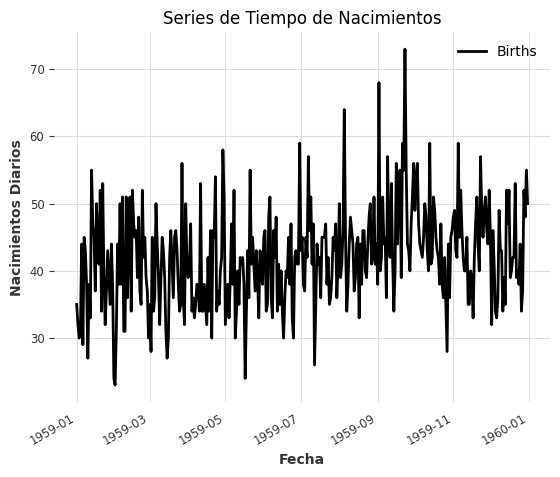

In [108]:
# Graficar la serie de tiempo
fig, ax = plt.subplots()
ts_births.plot(ax=ax)

ax.set_title("Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos Diarios")
plt.show()

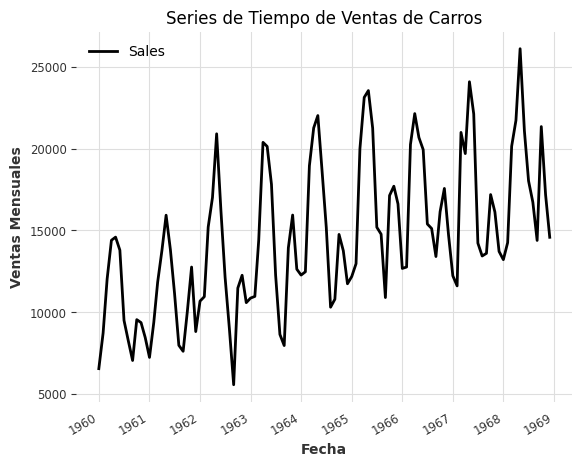

In [109]:
# Graficar la serie de tiempo
fig, ax = plt.subplots()
ts_car.plot(ax=ax)

ax.set_title("Series de Tiempo de Ventas de Carros")
ax.set_xlabel("Fecha")
ax.set_ylabel("Ventas Mensuales")
plt.show()

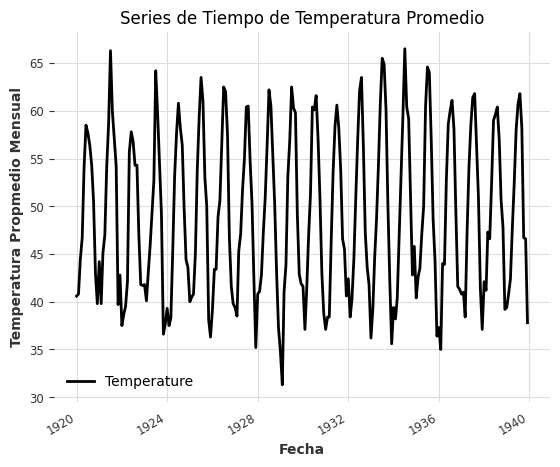

In [110]:
# Graficar la serie de tiempo
fig, ax = plt.subplots()
ts_temperature.plot(ax=ax)

ax.set_title("Series de Tiempo de Temperatura Promedio")
ax.set_xlabel("Fecha")
ax.set_ylabel("Temperatura Propmedio Mensual")
plt.show()

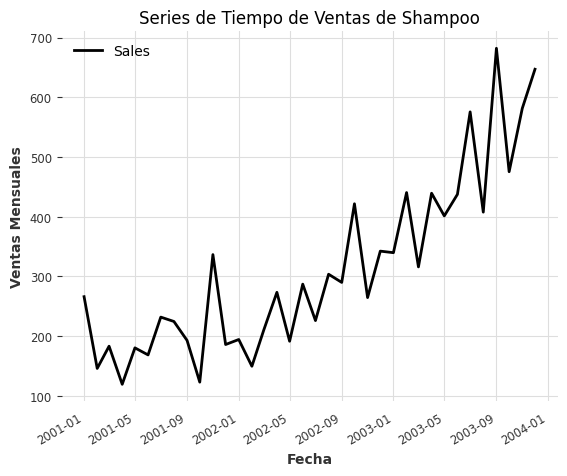

In [111]:
# Graficar la serie de tiempo
fig, ax = plt.subplots()
ts_shampoo.plot(ax=ax)

ax.set_title("Series de Tiempo de Ventas de Shampoo")
ax.set_xlabel("Fecha")
ax.set_ylabel("Ventas Mensuales")
plt.show()

In [74]:
# Entrenamiento y validación
train, val = ts[:-40], ts[-40:]

-------
### Promedios
- Aplicar métodos de promedios y comparar los resultados con el conjunto original

Método 1: Naive Moving Average

In [75]:
from darts.models import NaiveMovingAverage
from darts.metrics import rmse, mae

# Crear el modelo
model = NaiveMovingAverage()

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()


KeyboardInterrupt: 

Método 2: Naive Mean

RMSE = 6.89
MAE = 5.77


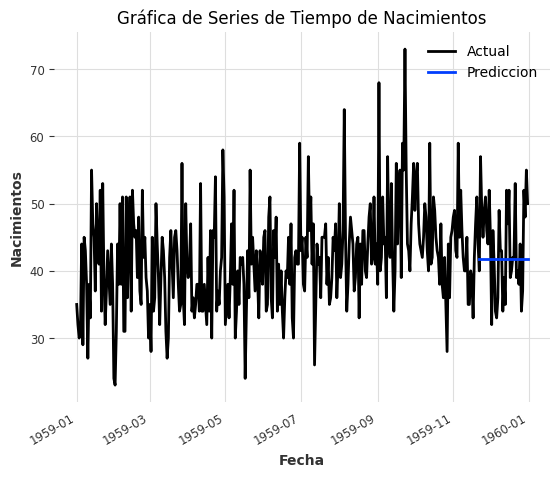

In [ ]:
from darts.models import NaiveMean

# Crear el modelo
model = NaiveMean()

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()

------
### SARIMA
- Identificar parámetros y ajustar un modelo SARIMA

-------
### Alisamiento Exponencial:
- Aplicar diferentes métodos de alisamiento exponencial y comparar.

Método 1: Single Exponential Smoothing

- No implementa tendencia ni estacionalidad. 

RMSE = 6.64
MAE = 5.62


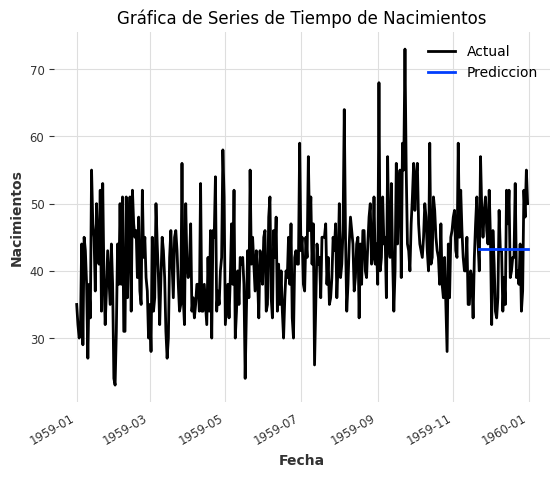

In [ ]:
from darts.models import ExponentialSmoothing

# Crear el modelo SIMPLE EXPONENTIAL SMOOTHING
model = ExponentialSmoothing(
    trend=None,               # No hay tendencia
    seasonal=None,            # No hay estacionalidad
)

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax, low_quantile=0.05, high_quantile=0.95)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()


Método 2: Double Exponential Smoothing

- Sí implementa tendencia pero no estacionalidad. 

RMSE = 6.65
MAE = 5.67


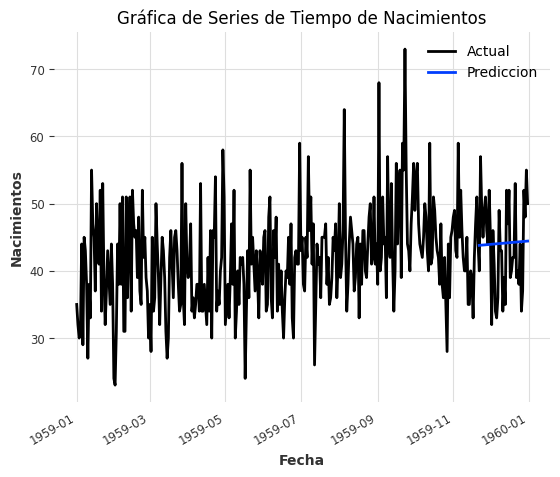

In [ ]:
from darts.utils.utils import ModelMode, SeasonalityMode

# Crear el modelo DOUBLE EXPONENTIAL SMOOTHING
model = ExponentialSmoothing(
    trend= ModelMode.ADDITIVE,              # Sí hay tendencia
    seasonal=None,                          # No hay estacionalidad
)

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax, low_quantile=0.05, high_quantile=0.95)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()


Método 3: Triple Exponential Smoothing (Holt-Winters' exponential smoothing)

- Sí implementa tendencia y estacionalidad. 

RMSE = 6.65
MAE = 5.47


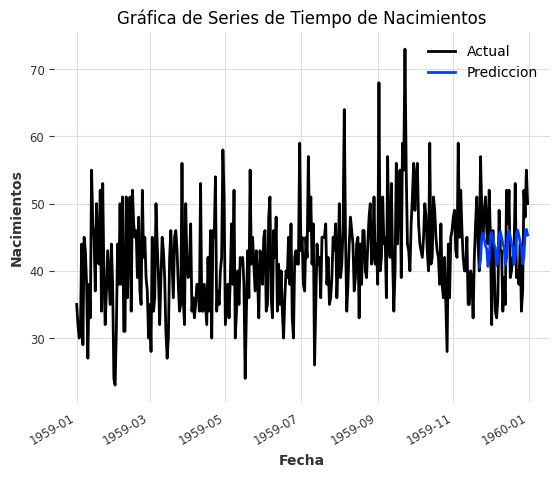

In [ ]:
# Crear el modelo TRIPLE EXPONENTIAL SMOOTHING
model = ExponentialSmoothing(
    trend= ModelMode.ADDITIVE,                  # Sí hay tendencia
    seasonal=SeasonalityMode.MULTIPLICATIVE     # Sí hay estacionalidad
    #seasonal_periods                           # Inferido automáticamente
)

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()


---------
### Prophet
- Utilizar Prophet para modelar la serie de tiempo.

18:49:55 - cmdstanpy - INFO - Chain [1] start processing
18:49:55 - cmdstanpy - INFO - Chain [1] done processing


RMSE = 7.02
MAE = 5.83


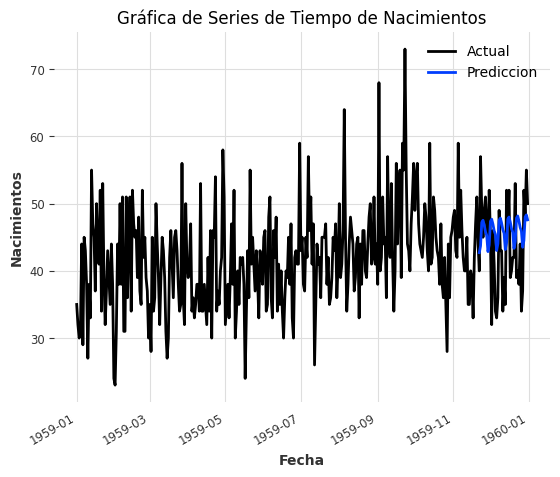

In [ ]:
from darts.models.forecasting.prophet_model import Prophet

# Crear el modelo
model = Prophet()

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()

Redes Neuronales:
• Implementar una red neuronal simple para prever la serie de tiempo

In [ ]:
from darts.models import RNNModel
from darts.utils.timeseries_generation import gaussian_timeseries

# Crear una serie de tiempo sintética (en caso de que no se tenga una serie real)
synthetic_ts = gaussian_timeseries(length=len(ts), freq='D', start_ts=ts.time_index[0])

rnn_model = RNNModel(input_chunk_length=32, output_chunk_length=10, n_epochs=100)
rnn_model.fit(synthetic_ts)
rnn_forecast = rnn_model.predict(forecast_horizon)

synthetic_ts.plot(label='Sintético')
rnn_forecast.plot(label='RNN Forecast')
plt.legend()
plt.show()


TypeError: gaussian_timeseries() got an unexpected keyword argument 'start_ts'

Comparación y Evaluación:
• Usar métricas como RMSE, MAE para comparar los modelos.
• Discutir cuál algoritmo se desempeña mejor para cada tipo de conjunto de datos y
por qué

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular métricas de evaluación para cada modelo
rmse_sarima = mean_squared_error(ts, sarima_forecast, squared=False)
mae_sarima = mean_absolute_error(ts, sarima_forecast)

rmse_rnn = mean_squared_error(synthetic_ts, rnn_forecast, squared=False)
mae_rnn = mean_absolute_error(synthetic_ts, rnn_forecast)

# Imprimir resultados
print(f'SARIMA RMSE: {rmse_sarima}, SARIMA MAE: {mae_sarima}')
print(f'RNN RMSE: {rmse_rnn}, RNN MAE: {mae_rnn}')
